# **Churn Prediction in the Waze App: Leveraging Feature Engineering and Machine Learning Models**


In this example, we will explore tree-based modeling techniques to predict a binary target class, focusing on user churn in the Waze app. <br>

**Objective:** Identify key factors driving user churn.

**Goal:** Predict whether a Waze user is retained or churned.


**Activity Structure:**

**Part 1:** Ethical Considerations

* Reflect on the ethical implications of predicting user churn.
* Assess whether the model's objective should be adjusted.


**Part 2:** Feature Engineering

* Perform feature selection, extraction, and transformation to prepare data for modeling.


**Part 3:** Modeling

* Develop, evaluate, and refine models.
* Provide recommendations for next steps.

# PACE Startegy: 

## Stage 1- Plan

To develop this stage, we will reflect on the following key questions:

**1. Understanding the objective**

What specifically are you being asked to accomplish with this model?


**2. Evaluating Ethical Implications**

* What are the ethical considerations associated with building and deploying this model?
* What are the potential consequences if the model makes errors?
    * False Negative: What is the impact if the model predicts a Waze user won’t churn, but they actually do?
    * False Positive: What is the impact if the model predicts a Waze user will churn, but they actually don’t?


**3. Weighing Benefits and Risks**

* Do the advantages of implementing this model outweigh the potential drawbacks and ethical challenges?


**4. Deciding on Next Steps**

* Based on your analysis, would you proceed with the request to build this model? Provide your reasoning.




**Summary**

* Objective
    * The goal is to predict whether a user will churn or remain active on the platform.

* Ethical Implications

    * It is crucial to ensure that the data and the model are free from bias and built to achieve a fair and unbiased conclusion.
     * Errors in the model can significantly impact the company, particularly in retaining customers.
       * False Negatives: These are especially severe as the Waze team may miss opportunities to take preventive actions to retain users.
        * False Positives: While costly, they are less detrimental than false negatives, as they may lead to unnecessary retention efforts rather than missed opportunities.

* Cost-Benefit Analysis

    * A well-designed model can outweigh potential issues by providing valuable insights and enabling proactive measures to reduce churn rates.

* Recommendation

    * The model can be used as a valuable decision-support tool. However, achieving high accuracy and addressing potential biases will be essential to ensure its effectiveness. 

### **Task 1. Imports and data loading**

Import packages and libraries needed to build and evaluate models.

In [94]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# The function helps to plot important feature
from xgboost import plot_importance

Now read in the dataset as `df0` and inspect the rows.


In [2]:
# Import dataset
df0 = pd.read_csv('waze_dataset.csv')

In [3]:
# Inspect the rows
df0.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone



## **Stage 2: Analyze**

### **Task 2. Feature engineering**

Much of the data preparation and exploratory data analysis (EDA) has already been completed in other Notebook **"Churn Prediction in the Waze App: Data Preparation and Exploratory Data Analysis (EDA)"**. During that process, some features were identified as having stronger correlations with churn, and additional features were created that may be valuable for modeling.

In this phase, the focus will be on engineering these existing features and developing new ones for use in the modeling process.

Let's create a copy of the original dataframe, df0, to preserve its integrity and name the copy df.

In [4]:
# Copy the original dataframe
df=df0.copy()

In [5]:
#find the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [6]:
# Inspect the new data frame
df.head(5)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


**Feature Engineering**

#### **Featur 1: `km_per_driving_day`**

* Create a new feature that calculates the average number of kilometers driven per driving day for each user over the past month. Add this feature as a new column in the dataframe df.

* Generate descriptive statistics for this newly created feature to understand its distribution and key metrics.


In [7]:
# 1. Create `km_per_driving_day` feature
df['km_per_driving_day']=df['driven_km_drives']/df['driving_days']
# Descriptive stats of the features
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1.499900e+04
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,inf
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,NaN
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,3.022063e+00
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,1.672804e+02
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,3.231459e+02
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,7.579257e+02
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,inf


Summary: 

Some values in the new column are infinite due to zeros in the driving_days column. Division by zero is undefined, and as a result, Pandas assigns infinity (np.inf) to these rows.

* Replace all instances of infinity in the km_per_driving_day column with zero using np.inf.

* Use the describe() method on the km_per_driving_day column to confirm that the replacements were successful.

In [8]:
# 1. Replace infinite values by zero
df['km_per_driving_day']=df['km_per_driving_day'].replace(np.inf, 0)
# 2. Validate that it is working
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,578.963113
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,1030.094384
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,15420.234110


Summary: 

Notoce that there is no `inf` value in the descriptive statistic

#### **Feature 2: `percent_sessions_in_last_month`**

* Add a new column, `percent_sessions_in_last_month`, to the dataframe. This column will calculate the percentage of each user's total sessions that occurred during their last month of activity.

* Generate descriptive statistics for the `percent_sessions_in_last_month column` to analyze its distribution and key metrics.

In [9]:
# 1. Create `percent_sessions_in_last_month` feature
### YOUR CODE HERE ###
df['percent_sessions_in_last_month']=df['sessions']/df['total_sessions']
# 1. Get descriptive stats
### YOUR CODE HERE ###
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,578.963113,0.449255
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,15420.234110,1.530637


#### **Feature 3: `professional_driver`**

Create a new binary feature, `professional_driver`, which assigns a value of 1 to users who meet both of the following criteria in the last month:

* Had 60 or more drives
* Drove on 15 or more days

Note: This feature aims to distinguish professional drivers from other users. The thresholds were determined based on domain knowledge and intuition, but they remain arbitrary in this context.

In [10]:
# Create `professional_driver` feature
df['professional_driver']=np.where((df['drives']>=60) & (df['driving_days']>=15),1,0)
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,professional_driver
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670,1
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.901868,0.406856,0
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186,0
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968,0
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266,1


#### **Feature 4: `total_sessions_per_day`**

Another feature that can represent the mean number of sessions per day since onboarding.

In [11]:
# Create `total_sessions_per_day` feature
df['total_sessions_per_day']=df['total_sessions']/df['n_days_after_onboarding']
# Get descriptive stats
df['total_sessions_per_day'].describe()

count    14999.000000
mean         0.338698
std          1.314333
min          0.000298
25%          0.051037
50%          0.100775
75%          0.216269
max         39.763874
Name: total_sessions_per_day, dtype: float64

#### **Feature 5: `km_per_hour`**
The mean kilometers per hour driven in the last month can be used another important feature.

In [12]:
# Let's create `km_per_hour` feature
df['km_per_hour']=(df['driven_km_drives']*60)/df['duration_minutes_drives']
df['km_per_hour'].describe()

count    14999.000000
mean       190.394608
std        334.674026
min         72.013095
25%         90.706222
50%        122.382022
75%        193.130119
max      23642.920871
Name: km_per_hour, dtype: float64

#### **Feature 6: `km_per_drive`**

Create a new column that calculates the average number of kilometers per drive for each user during the last month. Next, generate and display the descriptive statistics for this feature.

In [13]:
# Create `km_per_drive` feature
df['km_per_drive']=(df['driven_km_drives'])/df['drives']
df['km_per_drive'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.323065e+01
50%      7.488006e+01
75%      1.854667e+02
max               inf
Name: km_per_drive, dtype: float64

Summary: 

This feature also contains infinite values. Replace the infinite values with zero, then verify the changes to ensure they were applied successfully.

In [14]:
# 1. Replace infinite values by zero
df['km_per_drive']=df['km_per_drive'].replace(np.inf,0)
# 2. Validate it  that it worked
df['km_per_drive'].describe()

count    14999.000000
mean       232.817946
std        620.622351
min          0.000000
25%         32.424301
50%         72.854343
75%        179.347527
max      15777.426560
Name: km_per_drive, dtype: float64

#### **Feature 7: `percent_of_sessions_to_favorite`**

Create a new column that calculates the percentage of total sessions used to navigate to a user's favorite places. Print the descriptive statistics for this new column to analyze its distribution.

This metric serves as a proxy for the percentage of overall drives to favorite places. Since data on total drives since onboarding is unavailable in this dataset, total sessions act as a reasonable approximation.

Users whose drives to non-favorite places constitute a higher percentage of their total drives may be less likely to churn, as they are likely engaging in more exploration or visiting unfamiliar locations.

In [15]:
# Creating the feature `percent_of_sessions_to_favorite` 
df['percent_of_sessions_to_favorite']=(df['total_navigations_fav1']+df['total_navigations_fav2'])/df['total_sessions']
# Get descriptive stats
df['percent_of_sessions_to_favorite'].describe()

count    14999.000000
mean         1.665439
std          8.865666
min          0.000000
25%          0.203471
50%          0.649818
75%          1.638526
max        777.563629
Name: percent_of_sessions_to_favorite, dtype: float64

### **Task 3. Handling the missing values**


In [16]:
#counting the missing value
df.isnull().sum()

ID                                   0
label                              700
sessions                             0
drives                               0
total_sessions                       0
n_days_after_onboarding              0
total_navigations_fav1               0
total_navigations_fav2               0
driven_km_drives                     0
duration_minutes_drives              0
activity_days                        0
driving_days                         0
device                               0
km_per_driving_day                   0
percent_sessions_in_last_month       0
professional_driver                  0
total_sessions_per_day               0
km_per_hour                          0
km_per_drive                         0
percent_of_sessions_to_favorite      0
dtype: int64

Summary:
Based on prior EDA, there is no evidence of a systematic cause for the 700 missing values in the label column. 
Since these missing values represent less than 5% of the dataset, use the dropna() method to remove 
the rows with missing data in this column.

In [17]:
# Drop rows with missing values
df.dropna(axis=0, inplace=True)

In [18]:
#validate the non-null count for the features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14299 entries, 0 to 14998
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               14299 non-null  int64  
 1   label                            14299 non-null  object 
 2   sessions                         14299 non-null  int64  
 3   drives                           14299 non-null  int64  
 4   total_sessions                   14299 non-null  float64
 5   n_days_after_onboarding          14299 non-null  int64  
 6   total_navigations_fav1           14299 non-null  int64  
 7   total_navigations_fav2           14299 non-null  int64  
 8   driven_km_drives                 14299 non-null  float64
 9   duration_minutes_drives          14299 non-null  float64
 10  activity_days                    14299 non-null  int64  
 11  driving_days                     14299 non-null  int64  
 12  device            

### **Task 4. Outliers**

You know from previous EDA that many of these columns have outliers. However, tree-based models are resilient to outliers, so there is no need to make any imputations.

### **Task 5. Variable encoding**

#### **Dummying features**

To include device as a predictor variable, it must be converted to a binary format since it is categorical.

For datasets with many categorical variables, tools like Pandas `pd.get_dummies()` [https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html] or scikit-learn's `OneHotEncoder()` [https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.OneHotEncoder.html] can be used. However, these methods create a separate feature for each category, which may lead to a high feature-to-observation ratio and complicate model interpretation.

In this case, since the dataset has only one categorical variable (`device`), a direct transformation is more efficient.

Create a new binary column, `device2`, to encode the device variable as follows:

* Android → 0
* iPhone → 1

In [19]:
# Create a new variable `device2` 
df['device2']=df['device'].map({'Android': 0,'iPhone': 1})

In [20]:
# Reviewing the features
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,professional_driver,total_sessions_per_day,km_per_hour,km_per_drive,percent_of_sessions_to_favorite,device2
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670,1,0.130381,79.430298,11.632058,0.700931,0
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.901868,0.406856,0,0.266854,260.389902,128.186173,0.253903,1
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186,0,0.051121,113.953460,32.201567,0.000000,0
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968,0,4.505948,93.351141,22.839778,4.867640,1
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266,1,0.107713,194.342970,58.091206,1.016363,0


#### **Target encoding**

The target variable, `label`, is categorical, with users classified as either "churned" or "retained." To train the models, this variable needs to be converted to a binary format.

Assign `0` to all users labeled as `retained`.
Assign `1` to all users labeled as `churned`.
Save the transformed variable as `label2` to preserve the original `label` column.

Note: There are several ways to perform this transformation. Using `np.where()` is an efficient method, as demonstrated earlier in this notebook.

In [21]:
# Creating the column `label2` 
df['label2']=np.where(df['label']=='retained',0,1)
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,professional_driver,total_sessions_per_day,km_per_hour,km_per_drive,percent_of_sessions_to_favorite,device2,label2
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670,1,0.130381,79.430298,11.632058,0.700931,0,0
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.901868,0.406856,0,0.266854,260.389902,128.186173,0.253903,1,0
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186,0,0.051121,113.953460,32.201567,0.000000,0,0
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968,0,4.505948,93.351141,22.839778,4.867640,1,0
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266,1,0.107713,194.342970,58.091206,1.016363,0,0


### **Task 6. Feature selection**

Tree-based models are robust to multicollinearity, so no features need to be removed for this reason. However, the `ID` column should be dropped, as it contains no information relevant to predicting churn.

Additionally, the `device` column will not be used because it is a duplicate of `device2`.

Remove the `ID` column from the `df` dataframe

In [22]:
# Dropping `ID` column
df=df.drop(['ID'], axis=1)
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,professional_driver,total_sessions_per_day,km_per_hour,km_per_drive,percent_of_sessions_to_favorite,device2,label2
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670,1,0.130381,79.430298,11.632058,0.700931,0,0
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.901868,0.406856,0,0.266854,260.389902,128.186173,0.253903,1,0
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186,0,0.051121,113.953460,32.201567,0.000000,0,0
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968,0,4.505948,93.351141,22.839778,4.867640,1,0
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266,1,0.107713,194.342970,58.091206,1.016363,0,0


### **Task 7. Evaluation metric**

Before proceeding with modeling, it is essential to select an appropriate evaluation metric. This decision depends on the class balance of the target variable and the specific use case of the model.

Start by analyzing the class balance of the target variable.

In [23]:
# Find the class balance of 'label' feature
df['label'].value_counts(normalize=True)

retained    0.822645
churned     0.177355
Name: label, dtype: float64

Summary:

* Approximately 18% of users in this dataset churned, making it moderately imbalanced but manageable without the need for class rebalancing.
* Next, determine the most suitable evaluation metric. While accuracy may seem appealing, it is not always the best indicator of performance on imbalanced datasets, as a model can achieve high accuracy while failing to predict the minority class effectively.
* In this case, the consequences of false positives are minimal—no one is harmed, incurs financial loss, or faces other significant impacts if incorrectly predicted to churn. Therefore, prioritize the recall score when selecting the model, as it focuses on effectively identifying the minority class (users who churned).


## ** Stage 3: Construct**

### **Task 8. Modeling workflow and model selection process**

The final modeling dataset consists of 14,299 samples, which is sufficient, though on the lower end, for conducting a robust model selection process.

**Data Splitting Strategy:**

Split the data into training, validation, and test sets in a 60/20/20 ratio.
When deciding the split ratio and the use of a validation set for selecting the champion model, consider both the total number of samples in each partition and the representation of the minority class (users who churn). With an 18% churn rate:

    * The validation set (~2,860 samples) would contain approximately 515 churn examples.
    * The test set (~2,860 samples) would also include ~515 churn examples.
**Modeling Workflow:**

* Train models and tune hyperparameters on the training set.
* Use the validation set to perform final model selection.
* Evaluate the performance of the champion model on the test set to assess its generalization capability.

### **Task 9. Split the data**

Now it's time to prepare the data for modeling. Follow these steps to split the data into features, the target variable, and training/validation/test sets:

**Define Feature and Target Variables**
* Create a variable `X` to isolate the features, ensuring that device is excluded.
* Create a variable `y` to isolate the target variable (`label2`).


**Initial Split (80/20)**
* Split the data into an 80/20 ratio, with 80% forming an interim training set and 20% a test set.
* Stratify the splits to maintain the class distribution, and set the `random_state` to 42 for reproducibility.


**Secondary Split (75/25)**
* Further split the interim training set into a training set (75%) and a validation set (25%), resulting in a final 60/20/20 split for training/validation/test sets.
* Again, stratify the splits and set the `random_state` to ensure consistency.

In [24]:
# 1. Isolate the X variables by dropping the labels
X=df.copy().drop(columns=['label','label2','device'])

# 2. Isolate the y variable
y=df['label2']

# 3. Split the dataset into train and test sets
X_tr,X_test, y_tr, y_test=train_test_split(X,y, test_size=0.2, stratify=y,random_state=42)

# 4. Split it further into train and validate sets
X_train,X_val, y_train, y_val=train_test_split(X_tr,y_tr, test_size=0.25, stratify=y_tr, random_state=42)

In [25]:
# Verify the number of samples in the partitioned data.
print ('percent of data in train set:', X_train.shape[0])
print ('percent of data in train set:', X_val.shape[0])
print ('percent of data in train set:', X_test.shape[0])

percent of data in train set: 8579
percent of data in train set: 2860
percent of data in train set: 2860


Summary:

* Matches with the expected sample size.

### **Task 10. Modeling**

#### **Random Forest Model with GridSearchCV**

**1. Instantiate the Random Forest Classifier**

Create an instance of the random forest classifier `rf` and set the `random_state` for reproducibility.

**2. Define Hyperparameters for Tuning**

Create a dictionary `cv_params` with any of the following hyperparameters and their corresponding values for tuning. The more parameters you tune, the better the model may fit the data, but this will also increase `computation time`:

    * max_depth
    * max_features
    * max_samples
    * min_samples_leaf
    * min_samples_split
    * n_estimators

**3. Specify Scoring Metrics**

Define a list scoring with the evaluation metrics to capture during the grid search. Include metrics such as:

    * Precision
    * Recall
    * F1 score
    * Accuracy
    
   
**4. Set Up GridSearchCV**

Instantiate the GridSearchCV object rf_cv with the following arguments:

    * estimator=rf (the random forest classifier).
    * param_grid=cv_params (the hyperparameter grid).
    * scoring=`scoring` (the list of scoring metrics).
    * cv=_ (define the number of cross-validation folds).
    * refit= 'recall' (choose recall as the metric to determine the best model).

In [26]:
# 1. Instantiate the random forest classifier
rf=RandomForestClassifier(random_state=0)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.9],
             'min_samples_leaf': [2],
             'min_samples_split': [2],
             'n_estimators': [300],
             }

# 3. Define a list of scoring metrics to capture
scoring={'accuracy', 'recall', 'precision', 'f1'}

# 4. Instantiate the GridSearchCV object
rf_cv=GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

Let's fit the model to the training data.

In [27]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: total: 1min 20s
Wall time: 2min 6s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.9], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='recall', scoring={'f1', 'precision', 'recall', 'accuracy'})

In [28]:
# Examine the best average score across all the validation folds.
rf_cv.best_score_

0.12086614173228347

In [29]:
# Examine the best combination of hyperparameters.
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

Let's create a function called `make_results()` to get the scores of the model.

In [30]:
#create a function to get the evaluation metric and display by a Table 
def make_results(model_name:str, model_object, metric:str):
    """
        Arguments:
            model_name (str): The name you want to assign to the model in the output table.
            model_object: A fitted GridSearchCV object containing the trained model.
            metric (str): The evaluation metric to focus on (e.g., 'precision', 'recall', 'f1', or 'accuracy').

        Returns:
            pd.DataFrame: A DataFrame containing the F1, recall, precision, and accuracy scores
            for the model with the best mean score for the specified 'metric' across all validation folds.
    """

    # A dictionary to map the input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }
 # Create a data frame to store the results from the CV 
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Find the accuracy, precision, recall, and F1 score from the specified row 
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # FInally create the table and return it
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [31]:
#Pass the GridSearch object to the make_results() function.
make_results('random forest', rf_cv, 'recall')

,model,precision,recall,F1,accuracy
0,random forest,0.463905,0.120866,0.191647,0.819559


Summary: 

* Aside from accuracy, the scores are not particularly strong. However, compared to the logistic regression model built in the previous course, which achieved a recall of approximately 0.09, this model has a recall of 12.1%. This represents a significant improvement in recall, while maintaining similar accuracy, despite being trained on a smaller dataset.

* If desired, consider retuning the hyperparameters to further optimize the model. While any improvements may be marginal, there is potential to achieve slightly better performance.

#### **XGBoost Model Development**

The model performance can be tested by using an XGBoost classifier:

**1. Instantiate the XGBoost Classifier**

Create an instance of the XGBoost classifier, xgb, with the following settings:
* objective='binary:logistic' (for binary classification).
* Set the random_state for reproducibility.

**2. Define Hyperparameters for Tuning**

Create a dictionary, cv_params, containing the following hyperparameters and their respective values for tuning:
* max_depth
* min_child_weight
* learning_rate
* n_estimators

**3. Specify Scoring Metrics**

Define a list, scoring, to include the evaluation metrics for grid search:
* Precision
* Recall
* F1 score
* Accuracy

**4. Set Up GridSearchCV**

Instantiate the GridSearchCV object, xgb_cv, with the following arguments:
* estimator=xgb (the XGBoost classifier).
* param_grid=cv_params (the hyperparameter grid).
* scoring=scoring (list of evaluation metrics).
* cv (define the number of cross-validation folds).
* refit='recall' (select recall as the metric to determine the best model).

In [53]:
# 1. Instantiate the XGBoost classifier
xgb=XGBClassifier(objective='binary:logistic', random_state=0)

# 2. Create a dictionary of hyperparameters to tune
cv_params={'max_depth':[6,12], 'min_child_weight':[3,5], 'learning_rate':[0.01, 0.1], 'n_estimators':[300]}

# 3. Define a list of scoring metrics to capture
scoring=['accuracy', 'recall', 'precision', 'f1']

# 4. Instantiate the GridSearchCV object
xgb_cv=GridSearchCV(xgb,cv_params, cv=4, scoring=scoring, refit='recall')

Let's fit the model to the `X_train` and `y_train` data.


In [54]:
%%time
xgb_cv.fit(X_train,y_train)

CPU times: total: 3min 24s
Wall time: 28.9 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='recall', scoring=['accuracy', 'recall', 'precision', 'f1'])

In [55]:
# Get the best score from this model.
xgb_cv.best_score_

0.1708264263019754

In [56]:
# And the best parameters.
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 300}

In [57]:
# Use the make_results() function to output all of the scores of your model.
make_results('XGboost', xgb_cv, 'recall')

,model,precision,recall,F1,accuracy
0,XGboost,0.425932,0.170826,0.243736,0.811866


In [58]:
Xgb_cv_result=make_results('XGboost', xgb_cv, 'recall')
result=make_results('random forest', rf_cv, 'recall')
results=pd.concat([result,Xgb_cv_result], axis=0)
results

,model,precision,recall,F1,accuracy
0,random forest,0.463905,0.120866,0.191647,0.819559
0,XGboost,0.425932,0.170826,0.243736,0.811866


Summary: 

This model performed better than the random forest model, with a recall score significantly better than the random forest. It achieved approximately 41.6% higher recall than the random forest model while maintaining comparable accuracy and precision.

### **Task 11. Model selection**

Evaluate the validation data using both the top-performing random forest model and the best XGBoost model. The model with superior performance on the validation set will be selected as the champion model.

#### **Random forest**

In [59]:
# First the random forest model is used to predict on validation data
rf_val_pred=rf_cv.best_estimator_.predict(X_val)

Use the `get_test_scores()` function to generate a table of scores from the predictions on the validation data.

In [60]:
# Write a function named get_test_scores() function to generate a table to show the scores from the predictions of val data
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
    
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [61]:
# validation scores from RF model
rf_val_score=get_test_scores('rabdom_val_score',rf_val_pred,y_val)
# Append the result to the  table
results=pd.concat([results,rf_val_score], axis=0)
results

,model,precision,recall,F1,accuracy
0,random forest,0.463905,0.120866,0.191647,0.819559
0,XGboost,0.425932,0.170826,0.243736,0.811866
0,rabdom_val_score,0.453333,0.134122,0.207002,0.817832


Summary: 

The scores of precision and accuracy dropped slightly compared to the training scores while slight improvement in the score of recall and f1 score. This suggests that the model has not overfitted the training data and generalizes well to unseen data.

#### **XGBoost**

Let's do the same thing to get the performance scores of the XGBoost model on the validation data.

In [62]:
# Let's use XGBoost model to predict on validation data
xgboost_val=xgb_cv.best_estimator_.predict(X_val)

# Validation scores for XGBoost model
xgb_val_score=get_test_scores('xgb val score',xgboost_val,y_val )

# Append the results to the table
results=pd.concat([results, xgb_val_score], axis=0)
results

,model,precision,recall,F1,accuracy
0,random forest,0.463905,0.120866,0.191647,0.819559
0,XGboost,0.425932,0.170826,0.243736,0.811866
0,rabdom_val_score,0.453333,0.134122,0.207002,0.817832
0,xgb val score,0.422680,0.161736,0.233951,0.812238


Summary:

The XGBoost model's validation scores are slightly lower than its training scores. However, the drop is minimal, and it remains the clear champion model as the recall score is critical for this problem.


## **Stage 4: Execute**

### **Task 12. Predict on the test data using champion model**

Let's use the champion model to make predictions on the test dataset. This final evaluation provides an indication of how the model is expected to perform on future unseen data if implemented.

In [63]:
# Use XGBoost model to predict on test data
xgboost_test=xgb_cv.best_estimator_.predict(X_test)

# Get test scores for XGBoost model
xgboost_test_score=get_test_scores('xgboost_test_score', xgboost_test, y_test)

# Append to the results table
results=pd.concat([results,xgboost_test_score], axis=0)
results

,model,precision,recall,F1,accuracy
0,random forest,0.463905,0.120866,0.191647,0.819559
0,XGboost,0.425932,0.170826,0.243736,0.811866
0,rabdom_val_score,0.453333,0.134122,0.207002,0.817832
0,xgb val score,0.422680,0.161736,0.233951,0.812238
0,xgboost_test_score,0.423963,0.181460,0.254144,0.811189


Summary:

As the score on the test data has improved compared to the validation data, it suggests that the model generalizes well and performs better than expected on unseen data. This could indicate:

* Good Generalization: The model has learned patterns that apply broadly, rather than overfitting to the training or validation data.

* Random Variability: There may be some inherent randomness in the data splits or slight differences in the distributions between validation and test datasets that led to improved performance on the test data.

* Data Characteristics: The test data might have characteristics that make it easier for the model to predict compared to the validation set.

### **Task 13. Confusion matrix**

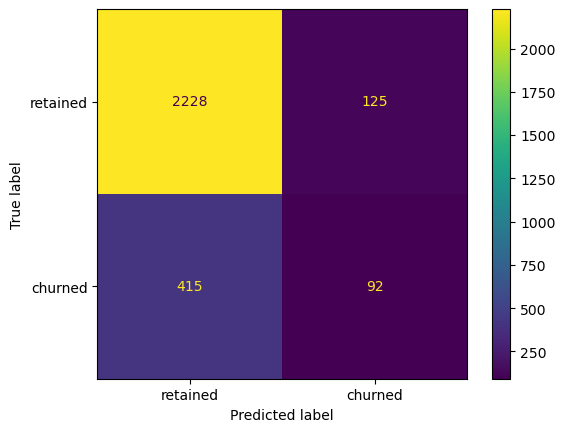

In [64]:
# Let's Plot a confusion matrix to visualize the performace on the test data.
# Initiate the confusion matrix with array of values
cm=confusion_matrix(y_test, xgboost_test, labels=xgb_cv.classes_)
# Plotting the confusion matrix
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['retained', 'churned'])
disp.plot()

Summary:

The model predicted 3.3 times as many false negatives than it did false positives, and it correctly identified only 18.1% of the users who actually churned.

### **Task 14. Feature importance**

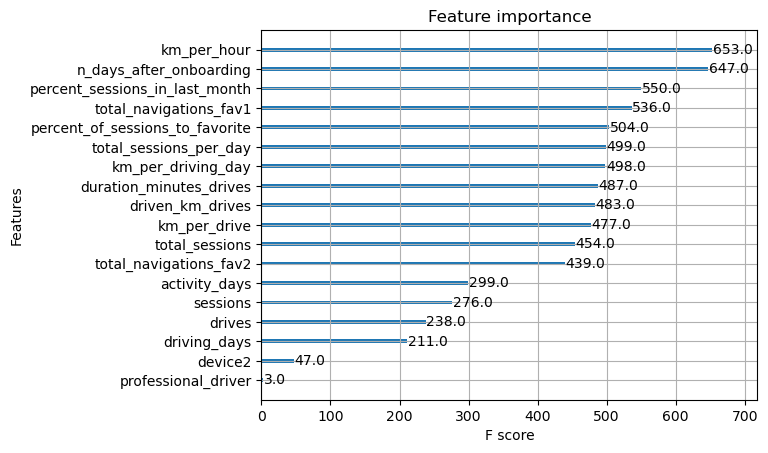

In [65]:
# let's use the `plot_importance` function to inspect the most important features 
plot_importance(xgb_cv.best_estimator_)

Summary:

* The XGBoost model utilized a broader range of features compared to the logistic regression model from the previous project "Churn Prediction in the Waze App: Data Preparation and Exploratory Data Analysis (EDA)", which heavily relied on a single feature (activity_days) for its predictions.

* This highlights the critical role of feature engineering. Notably, six of the top 10 features (and three of the top five) were engineered features, demonstrating how well-designed features can significantly enhance model performance.

* It’s also important to recognize that feature importance can vary across models. A feature deemed critical in one model may have little influence in another. This is why features should not be prematurely discounted as unimportant. Thorough exploration and an understanding of their relationships with the target variable are essential. Discrepancies in feature importance often arise due to complex interactions between features.

* Finally, it’s worth remembering that machine learning relies on the presence of a predictive signal in the data. If the data lacks meaningful patterns related to the target variable, even the most advanced algorithms cannot produce consistent or accurate predictions. Machine learning is a powerful tool, but it is not a substitute for informative and relevant data.

### Task 15. Identify an optimal threshold

In most classification algorithm implementations, including scikit-learn's, the default decision threshold is set to 0.5. For the Waze models, this means that if a user was predicted to have a 50% or higher probability of churning, they were classified as `1` (churn predicted).

However, for imbalanced datasets where the target class is a minority, a 0.5 threshold may not be optimal. Adjusting the threshold can help improve performance metrics like recall or precision, depending on the specific goals.

A precision-recall curve is a valuable tool for visualizing the trade-off between precision and recall and determining the most suitable threshold for the model.

Below is the precision-recall curve for the XGBoost champion model evaluated on the test data

Text(0.5, 1.0, 'precision_recall Curve, xgboost_cv')

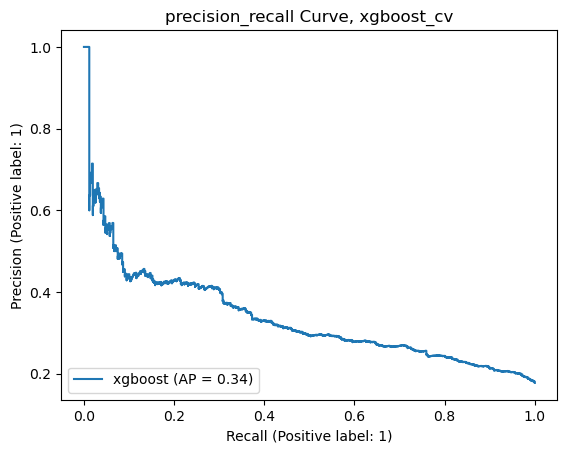

In [67]:
# Plotting the precision-recall curve for optimal threshold
from sklearn.metrics import PrecisionRecallDisplay
display=PrecisionRecallDisplay.from_estimator(xgb_cv.best_estimator_, X_test, y_test, name='xgboost')
plt.title('precision_recall Curve, xgboost_cv')

Recall and precision often have an inverse relationship; as recall improves, precision tends to decrease. However, in scenarios where false positives have minimal impact—such as this Waze project—a false positive might only result in a non-churning user receiving an email or a banner notification, which is a low-risk outcome.

In such cases, lowering the default decision threshold of 0.5 could be beneficial. By setting a lower threshold, the model becomes more sensitive to potential churners, increasing recall and capturing more true positives.

Here’s an example with the decision threshold adjusted to 0.4:

In [68]:
# Predicted probabilities on the test data 
predicted_probabilities=xgb_cv.best_estimator_.predict_proba(X_test)
predicted_probabilities

array([[0.94572806, 0.05427194],
       [0.57626796, 0.42373204],
       [0.98132175, 0.01867824],
       ...,
       [0.8135836 , 0.18641636],
       [0.9661311 , 0.03386891],
       [0.7386279 , 0.26137212]], dtype=float32)

The `predict_proba()` method returns a 2D array of probabilities, with each row corresponding to a user. The first value in each row represents the probability of the user belonging to the negative class, while the second value represents the probability of belonging to the positive class. (These two values are complementary and always sum to 1.)

By adjusting the decision threshold, you can generate new predictions based on these probabilities. For instance, the following code applies a threshold of 0.4 to convert the predicted probabilities into binary predictions {0, 1}. Users with a probability of 0.4 or higher in the second column are assigned a prediction of `1`, indicating that they are predicted to churn

In [71]:
# Take the second column values which represnts the probability of target
prob=[predicted_probabilities[1,:]]
#create the list
prob=[x[1] for x in predicted_probabilities]

# Using the threshold 0.4
new_pred=np.array ([1 if x>=0.4 else 0 for x in prob])
new_pred

array([0, 1, 0, ..., 0, 0, 0])

In [73]:
# Find the scores of the metrics for the threshold 0.4
result_new_treshold_0_4=get_test_scores('xgb_test_score, 0.4 threshold',y_test,new_pred)
result_new_treshold_0_4

,model,precision,recall,F1,accuracy
0,"xgb_test_score, 0.4 threshold",0.284024,0.414986,0.337237,0.802098


In [74]:
#Add the value to the table and compare it with other models 
results=pd.concat([results,result_new_treshold_0_4], axis=0)

In [75]:
results

,model,precision,recall,F1,accuracy
0,random forest,0.463905,0.120866,0.191647,0.819559
0,XGboost,0.425932,0.170826,0.243736,0.811866
0,rabdom_val_score,0.453333,0.134122,0.207002,0.817832
0,xgb val score,0.422680,0.161736,0.233951,0.812238
0,xgboost_test_score,0.423963,0.181460,0.254144,0.811189
0,"xgb_test_score, 0.4 threshold",0.284024,0.414986,0.337237,0.802098


Summary:

* Recall and F1 score improved significantly, while precision and accuracy declined.
* Using the precision-recall curve as a reference, a scenario can be considered where a recall score of 0.5 is deemed acceptable, even if it corresponds to a precision score of approximately 30%. This implies that the model is effective in identifying half of the actual churners, even though only 30% of its churn predictions are correct.
* Determining the threshold that achieves this balance can be approached in various ways. One method involves using a function to identify the threshold that meets these criteria.

In [88]:
def threshold_finder(y_test_data, probabilities, desired_recall):
   
    '''
            Find the threshold that achieves a recall score closest to the specified value.

            Inputs:
                y_test_data: Array containing the true labels for the test data.
                probabilities: Array of predicted probabilities from the `predict_proba()` method.
                desired_recall: The target recall score to approximate.

            Outputs:
                threshold: The threshold value that yields the recall score closest to the desired value.
                recall: The actual recall score associated with the selected threshold.
    '''
    
    probs = [x[1] for x in probabilities]  # take any one of the column, in this case second column of `probabilities` 
    thresholds = np.arange(0, 1, 0.001)    # Setting the theshold grid to test (here 100 values are tested) 

    scores = [] # store the recall score for each one of the thresholds
    for threshold in thresholds:
        # Create an array of predictions {0, 1} based on new threshold
        preds = np.array([1 if x >= threshold else 0 for x in probs])
        # Find the score of the desired metric, in this case recall score
        recall = recall_score(y_test_data, preds)
        # Append the threshold and its corresponding recall score
        scores.append((threshold, recall))

    distances = [] # store the distance from the desired recall score and its index as a tuple 
    for idx, score in enumerate(scores):
        # find the difference between the desired recall score and each one of the calculated score 
        distance = abs(score[1] - desired_recall)
        # Append the (index, distance)  to the list named distances
        distances.append((idx, distance))

    # Sort the distance from lowest to the highest based on the second value (distance) in the tuple 
    sorted_distances = sorted(distances, key=lambda x: x[1], reverse=False)
    # find the tuple with lowest distance from the desired recall value
    best = sorted_distances[0]
    # find the index of smallest distance from the desired recall score
    best_idx = best[0]
    # finally retrieve the threshold and actual recall score closest to desired recall
    threshold, recall = scores[best_idx]

    return threshold, recall


# Task 16: Find the threshold closest to 0.5 (any desired value)

In [90]:
# Determine the predicted probabilities from the champion model
predicted_probabilities=xgb_cv.best_estimator_.predict_proba(X_test)

# Call the function threshold_finder 
threshold, recall=threshold_finder(y_test, predicted_probabilities, 0.5)

In [91]:
threshold, recall

(0.194, 0.4990138067061144)

Summary: 
The closest recall value acheived is 0.499 and the threshold required to achieve the value is 0.194.

To validate this, the earlier steps can be repeated to calculate the other evaluation metrics using a threshold of 0.194. According to the precision-recall curve, a recall score of 0.5 should correspond to a precision of approximately 0.3.

In [92]:
# Create an array of new predictions considering the recall value 0.194 
probs=[x[1] for x in predicted_probabilities]
array_more_0194=np.array ([1 if prob>=0.194 else 0 for prob in probs ])
# Find the value of the evaluation metrics for threshold is 0.194
result_treshold_0194=get_test_scores('xgb_test_score, 0.194 threshold',y_test,array_more_0194)
result_treshold_0194

,model,precision,recall,F1,accuracy
0,"xgb_test_score, 0.194 threshold",0.499014,0.293163,0.369343,0.697902


Summary:
* The result aligns with the function's output, confirming the accuracy and reliability of the threshold_finder function.